In [1]:
## Stroke prediction dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# to check if variables are in correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [7]:
# to check for missing values in dataset
# 'bmi' has 3.93% missing values
100*(df.isnull().sum()/len(df))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
# to check for duplicated values in dataset
duplicates = df[df.duplicated()]

In [9]:
# print duplicated rows, there are no duplicated row in dataset
duplicates

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


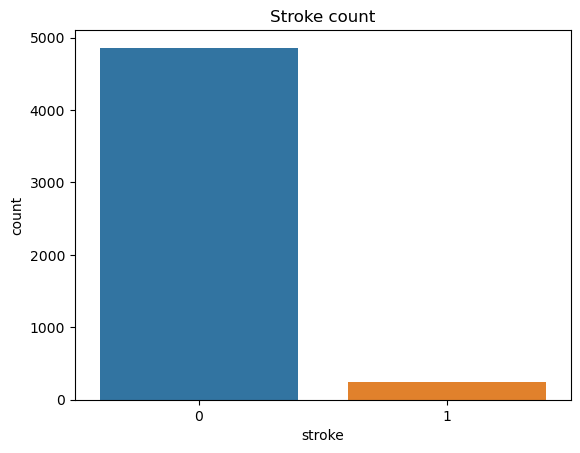

In [10]:
# to check the target variable, 'stroke'
# class imbalanced observed, negative cases outweighing positive cases
sns.countplot(data=df, x='stroke')
plt.title('Stroke count')
plt.show()

In [11]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [12]:
# to check correlation of numeric variables in dataset
df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1).corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


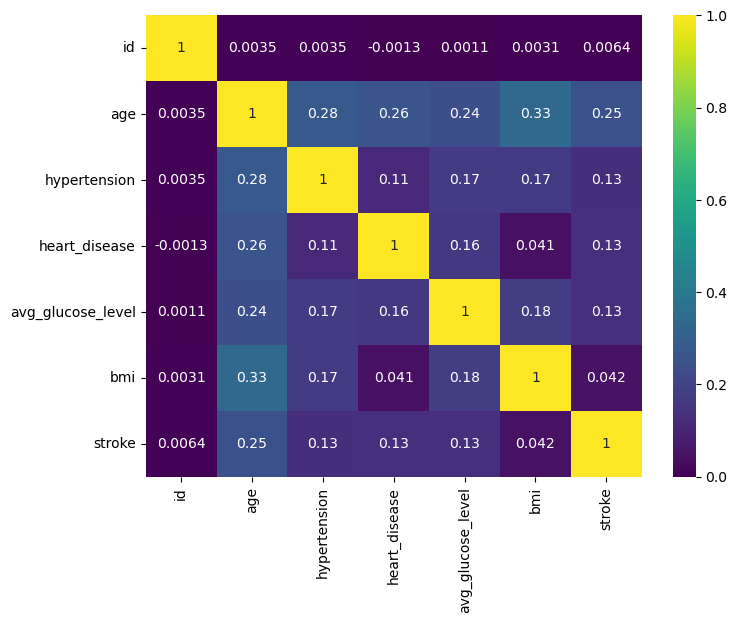

In [13]:
# to visualise numeric variables in a heatmap
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1).corr(), annot=True, cmap='viridis')
plt.show()

In [14]:
# to check correlation against target variable 'stroke', age shows the strongest correlation to 'stroke'
df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1).corr()['stroke'].sort_values()

id                   0.006388
bmi                  0.042374
hypertension         0.127904
avg_glucose_level    0.131945
heart_disease        0.134914
age                  0.245257
stroke               1.000000
Name: stroke, dtype: float64

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


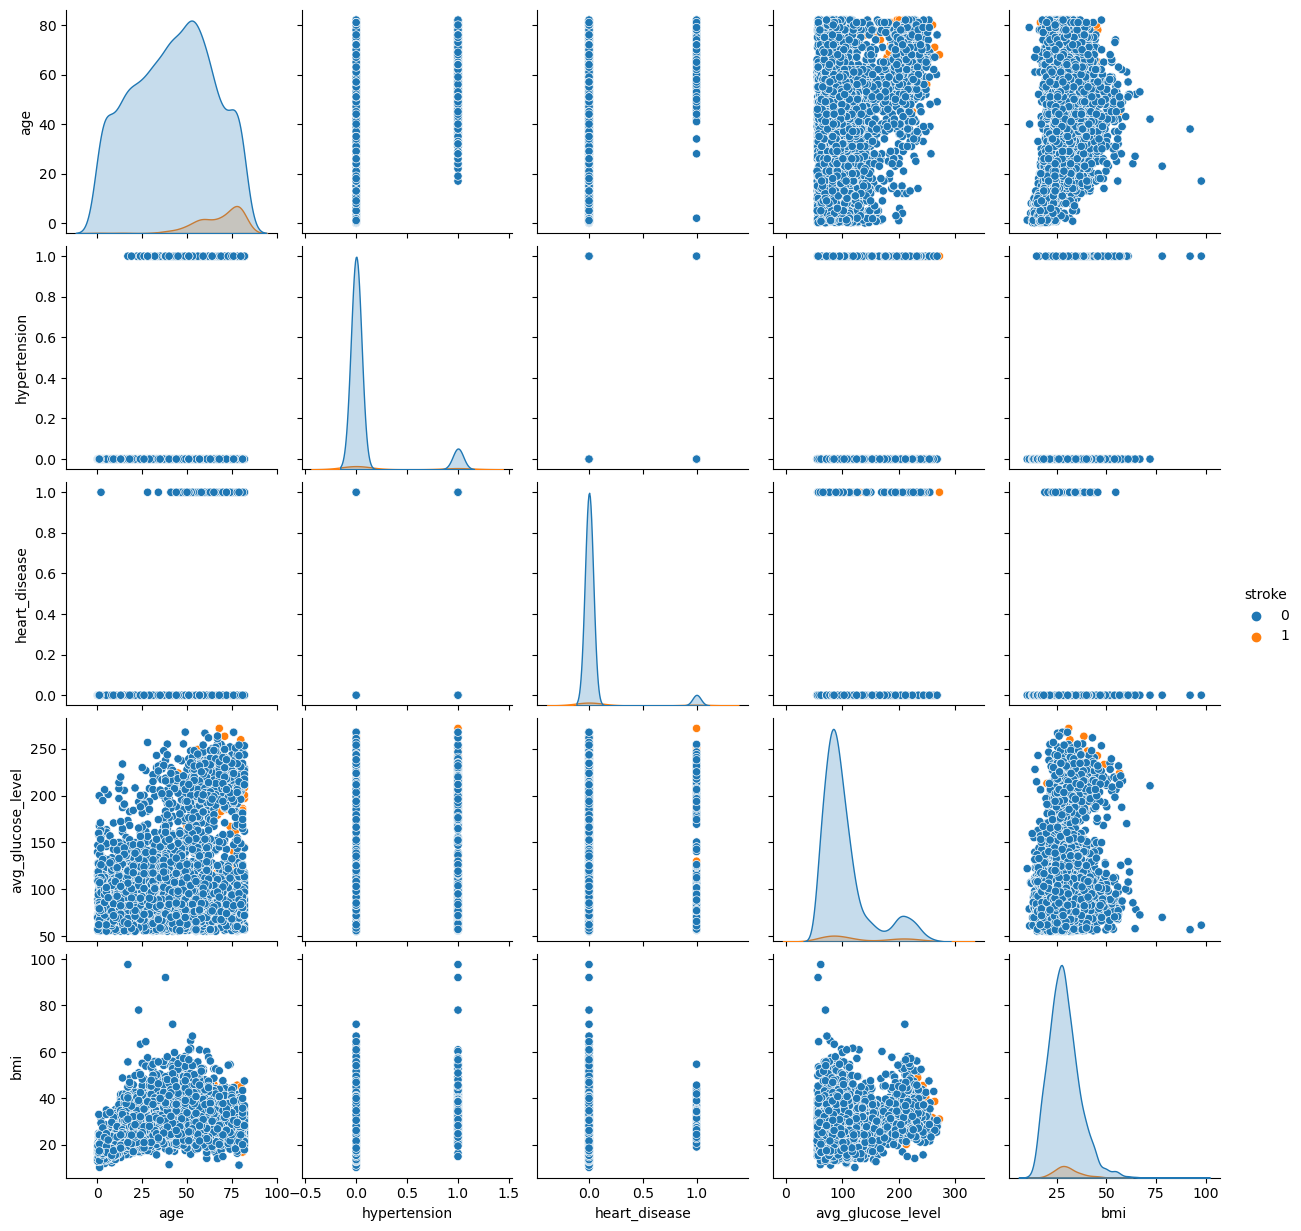

In [15]:
# to see the hue among all numeric variables
sns.pairplot(data=df.drop('id',axis=1), hue='stroke')
plt.show()

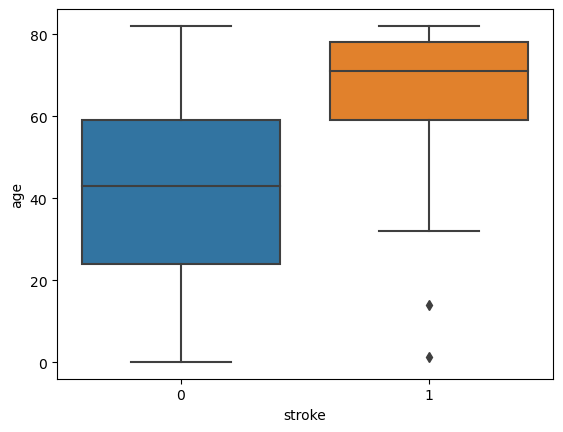

In [16]:
# to visualise 'age' vs 'stroke','age' is a continuous variable
# stroke occurs to elderly people from age 60 onwards
sns.boxplot(data=df, x='stroke', y='age')
plt.show()

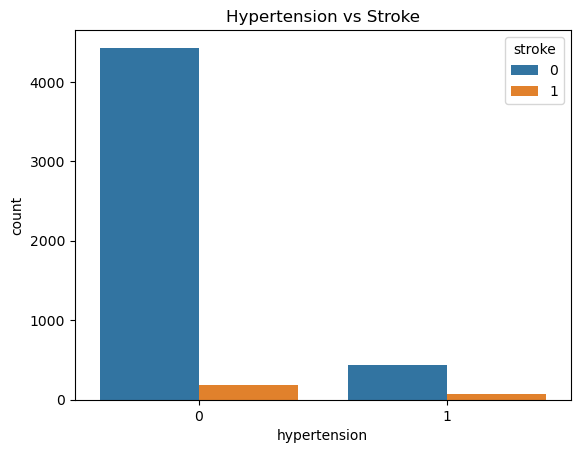

In [17]:
sns.countplot(data=df, x='hypertension', hue='stroke')
plt.title('Hypertension vs Stroke')
plt.show()

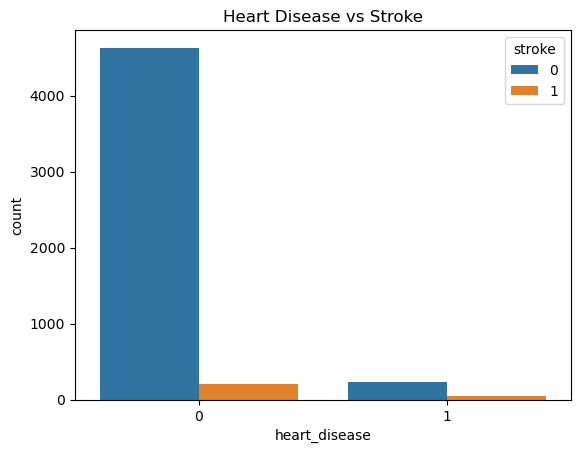

In [18]:
# heart disease vs stroke
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title('Heart Disease vs Stroke')
plt.show()

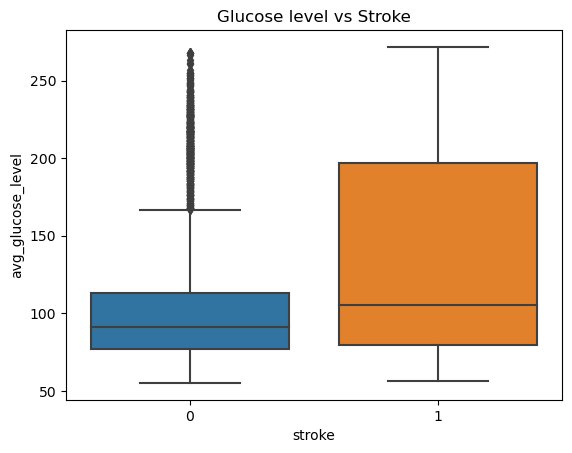

In [19]:
# to visualise glucose level against stroke
# avg_glucose_level is a continous variable
#stroke patients have a higher average glucose level
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Glucose level vs Stroke')
plt.show()

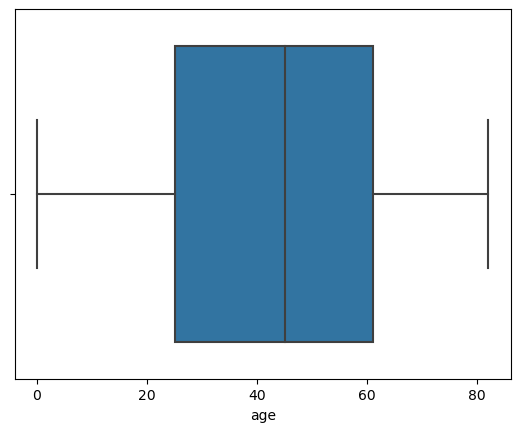

In [20]:
# to check for outliers in number variable, 'age'
# age has no outliers
sns.boxplot(data=df, x='age')
plt.show()

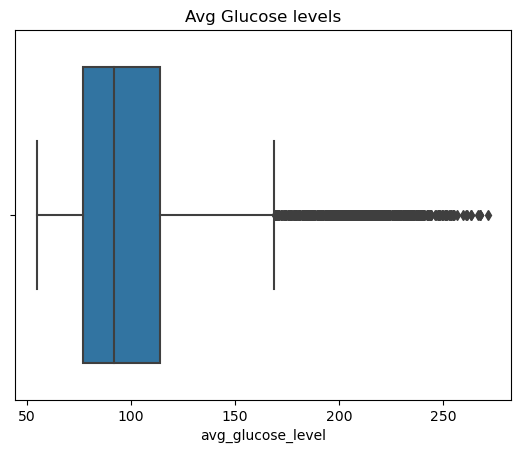

In [21]:
# to check for outliers in number variable, 'avg_glucose_level'
# avg_glucose_level has no outliers
sns.boxplot(data=df, x='avg_glucose_level')
plt.title('Avg Glucose levels')
plt.show()

In [22]:
# to remove outliers values in 'avg_glucose_level' as it might skew the analysis
Q1_25 = df['avg_glucose_level'].quantile(0.25)
Q1_25

77.245

In [23]:
Q3_75 = df['avg_glucose_level'].quantile(0.75)
Q3_75

114.09

In [24]:
# interquartile range for 'avg_glucose_level'
IQR = Q3_75 - Q1_25
IQR

36.845

In [25]:
# avg_glucose_level upper limits
gl_upper_limit = 114.09 + 1.5*36.845
gl_upper_limit = round(gl_upper_limit,2)
gl_upper_limit

169.36

In [26]:
# avg_glucose_level lower limits
gl_lower_limit = 77.245 + 1.5*36.845
gl_lower_limit

132.5125

In [27]:
# finding upper limit outliers
gl_upper_array = df[df['avg_glucose_level'] > gl_upper_limit]

In [28]:
# finding upper lower outliers
gl_lower_array = df[df['avg_glucose_level'] > gl_lower_limit]

In [29]:
# to remove outliers from 'avg_glucose_level'
df2 = df[(df['avg_glucose_level'] < gl_upper_limit)]
df2.shape

(4483, 12)

In [30]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,4483.0,36584.557439,21183.891836,67.00,17877.00,37025.00,54815.50,72940.00
age,4483.0,40.886317,22.389719,0.08,23.00,42.00,58.00,82.00
hypertension,4483.0,0.074950,0.263340,0.00,0.00,0.00,0.00,1.00
heart_disease,4483.0,0.038590,0.192638,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4483.0,91.435077,22.635346,55.12,75.06,87.96,103.93,168.68
bmi,4343.0,28.311996,7.655854,10.30,23.10,27.60,32.40,97.60
stroke,4483.0,0.036806,0.188305,0.00,0.00,0.00,0.00,1.00


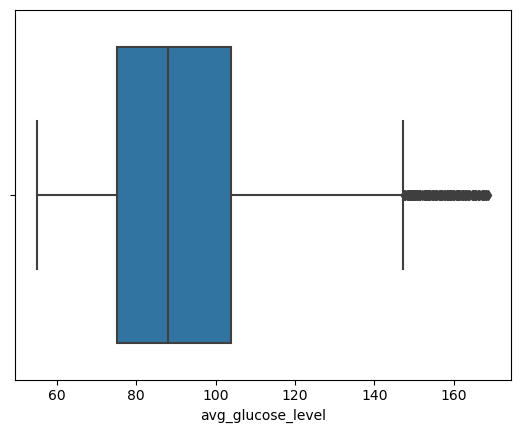

In [31]:
# to double check, some outlier values for glucose levels have been removed
sns.boxplot(data=df2, x='avg_glucose_level')
plt.show()

In [32]:
100*(df2.isnull().sum()/len(df))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  2.739726
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [33]:
df2['bmi']

2       32.5
6       27.4
7       22.8
8        NaN
9       24.2
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4483, dtype: float64

In [34]:
# to observe correlation between the 'bmi' variable,
# 'age' shows the highest correlation to 'bmi'
df2.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1).corr()['bmi'].sort_values()

avg_glucose_level   -0.010760
stroke               0.015141
id                   0.015403
heart_disease        0.039072
hypertension         0.154990
age                  0.328310
bmi                  1.000000
Name: bmi, dtype: float64

In [35]:
# to remove all missing values
df2 = df2.dropna()

In [36]:
df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [37]:
df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
X = df2.drop(['id','stroke'], axis=1)

In [39]:
# to convert categorical variables to dummy variables before machine learning
# drop_first = True to remove the first column of every categorical variable to prevent multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [40]:
y = df2['stroke']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 2 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4343 non-null   float64
 1   hypertension                    4343 non-null   int64  
 2   heart_disease                   4343 non-null   int64  
 3   avg_glucose_level               4343 non-null   float64
 4   bmi                             4343 non-null   float64
 5   gender_Male                     4343 non-null   bool   
 6   gender_Other                    4343 non-null   bool   
 7   ever_married_Yes                4343 non-null   bool   
 8   work_type_Never_worked          4343 non-null   bool   
 9   work_type_Private               4343 non-null   bool   
 10  work_type_Self-employed         4343 non-null   bool   
 11  work_type_children              4343 non-null   bool   
 12  Residence_type_Urban            4343 no

In [42]:
# import train test split
from sklearn.model_selection import train_test_split

In [43]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [44]:
# testing set= 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
# to scale the X_train and X_test set before machine learning, age, avg glucose level and bmi are of different scales
scaler = StandardScaler()

In [46]:
scaled_X_train = scaler.fit_transform(X_train)

In [47]:
scaled_X_test = scaler.transform(X_test)

In [48]:
# there is class imbalanced observed in the target variable 'stroke', negative cases outweigh positive cases
# to do oversampling of positive cases, 1
from imblearn.over_sampling import SMOTE

In [49]:
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions y_train dataset:  (3474,)
Number transactions y_test dataset:  (869,)


In [50]:
# to Oversample 'y' in y training set
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 108
Before OverSampling, counts of label '0': 3366 



In [51]:
# https://spotintelligence.com/2023/02/17/smote-oversampling-python-r/
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(scaled_X_train, y_train)

In [52]:
# to check the length of both X and y training set after Oversampling with SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# to resample positve cases in both  Y train and test set
# check that after oversampling, both 1 and 0 cases have the same number
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (6732, 16)
After OverSampling, the shape of train_y: (6732,) 

After OverSampling, counts of label '1': 3366
After OverSampling, counts of label '0': 3366


In [53]:
# to import logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [54]:
log_model = LogisticRegression()

In [55]:
# to fit the logistic regression model to X, Y training data
log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [56]:
# to predict on the x test set, unseen data
log_preds = log_model.predict(scaled_X_test)

In [57]:
# to import performance evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [58]:
print(confusion_matrix(y_test,log_preds))
print('\n')
print(classification_report(y_test,log_preds)) # Logistic regression model has 75% accuracy

[[634 207]
 [  6  22]]


              precision    recall  f1-score   support

           0       0.99      0.75      0.86       841
           1       0.10      0.79      0.17        28

    accuracy                           0.75       869
   macro avg       0.54      0.77      0.51       869
weighted avg       0.96      0.75      0.83       869



In [59]:
# to import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn_model = KNeighborsClassifier()

In [61]:
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [62]:
# to do prediction on x test set
knn_preds = knn_model.predict(scaled_X_test)

In [63]:
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds)) # KNN classifier is 89% accurate

[[765  76]
 [ 22   6]]


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       841
           1       0.07      0.21      0.11        28

    accuracy                           0.89       869
   macro avg       0.52      0.56      0.52       869
weighted avg       0.94      0.89      0.91       869



In [64]:
# to import random forest classifer model
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier()

In [66]:
# to fit the RF model to X , Y training set
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [67]:
# to do predictions on X test set
rf_preds = rf.predict(scaled_X_test)

In [68]:
rf_preds[:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
print(confusion_matrix(y_test,rf_preds))
print('\n')
print(classification_report(y_test,rf_preds)) # random forest classifier is 95% accuracy

[[826  15]
 [ 27   1]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       841
           1       0.06      0.04      0.05        28

    accuracy                           0.95       869
   macro avg       0.52      0.51      0.51       869
weighted avg       0.94      0.95      0.95       869



In [70]:
# to import AdaBoost and Gradient boosting classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [71]:
ada_model = AdaBoostClassifier()

In [72]:
ada_model.fit(X_train_res, y_train_res)

AdaBoostClassifier()

In [73]:
ada_preds = ada_model.predict(scaled_X_test)

In [74]:
print(confusion_matrix(y_test,ada_preds))
print('\n')
print(classification_report(y_test,ada_preds)) # AdaBoost model is 84% accurate

[[718 123]
 [ 12  16]]


              precision    recall  f1-score   support

           0       0.98      0.85      0.91       841
           1       0.12      0.57      0.19        28

    accuracy                           0.84       869
   macro avg       0.55      0.71      0.55       869
weighted avg       0.96      0.84      0.89       869



In [75]:
# Gradient Boosting model
gb_model = GradientBoostingClassifier()

In [76]:
gb_model.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [77]:
gb_preds= gb_model.predict(scaled_X_test)

In [78]:
print(confusion_matrix(y_test,gb_preds))

[[771  70]
 [ 21   7]]


In [79]:
print(classification_report(y_test,gb_preds)) # Gradient boosting model is 90% accurate

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       841
           1       0.09      0.25      0.13        28

    accuracy                           0.90       869
   macro avg       0.53      0.58      0.54       869
weighted avg       0.95      0.90      0.92       869



In [80]:
# the Random Forest classifier model shows the highest accuracy = 95%
rf.feature_importances_

array([3.30351306e-01, 3.36161660e-02, 1.43516926e-02, 1.19017219e-01,
       1.26237672e-01, 4.77170395e-02, 0.00000000e+00, 8.34103870e-02,
       1.09070079e-05, 4.19441193e-02, 2.26666614e-02, 2.50568908e-02,
       7.45947534e-02, 2.35478789e-02, 3.88531027e-02, 1.86242045e-02])

In [81]:
# to read into 'Feature Importance' dataframe
pd.DataFrame(index = X.columns, data= rf.feature_importances_, columns=['Importance'])

,Importance
age,0.330351
hypertension,0.033616
heart_disease,0.014352
avg_glucose_level,0.119017
bmi,0.126238
gender_Male,0.047717
gender_Other,0.000000
ever_married_Yes,0.083410
work_type_Never_worked,0.000011
work_type_Private,0.041944


In [82]:
# to read into a new dataframe
imp_feat = pd.DataFrame(index = X.columns, data= rf.feature_importances_, columns=['Importance'])

In [83]:
# to sort values of dataframe
imp_feat = imp_feat.sort_values('Importance', ascending=False)

In [84]:
# to remove importance less than 0
imp_feat = imp_feat[imp_feat['Importance'] > 0]

In [85]:
imp_feat

,Importance
age,0.330351
bmi,0.126238
avg_glucose_level,0.119017
ever_married_Yes,0.083410
Residence_type_Urban,0.074595
gender_Male,0.047717
work_type_Private,0.041944
smoking_status_never smoked,0.038853
hypertension,0.033616
work_type_children,0.025057


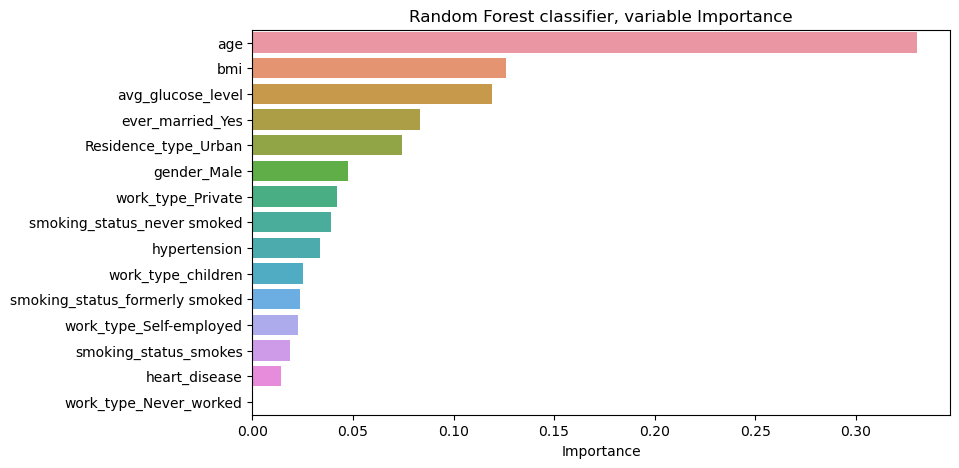

In [86]:
# the Random Forest classifier model shows the highest accuracy = 95%
# to make a barplot of 'Feature Importance', Random Forest Classifer model
# top 3 predictors of stroke = 'age','bmi','avg_glucose_levels'
plt.figure(figsize=(9,5),dpi=100)
sns.barplot(data=imp_feat, y=imp_feat.index, x='Importance')
plt.title('Random Forest classifier, variable Importance')
plt.show()